In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


###  Exploratory Data Analysis (EDA)

In [4]:
# Normalize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [5]:
# Normalize string values in each object-type column
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.lower().str.replace(' ', '_')


In [6]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

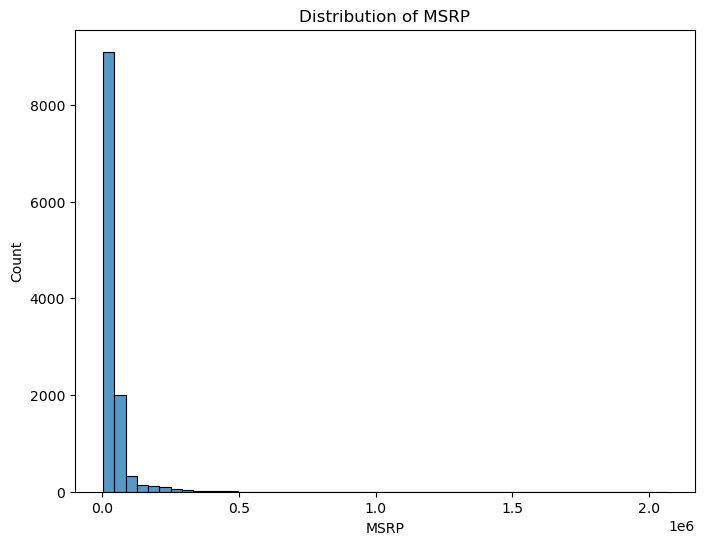

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df['msrp'], bins=50, kde=False)
plt.title('Distribution of MSRP')
plt.xlabel('MSRP')
plt.ylabel('Count')
plt.show()

### Observations
From the histogram, we can see the distribution is heavily skewed to the right—most cars have relatively low MSRP, with a long tail of very high-priced cars. This is typical for price-like data.

When the target variable is highly skewed, a log transformation can help in a couple of ways:
* Stabilize variance: A log transform compresses the range of values, reducing the effect of very large outliers.
* Improve model performance: Many machine learning models (like linear regression) perform better when the target variable is closer to a normal distribution

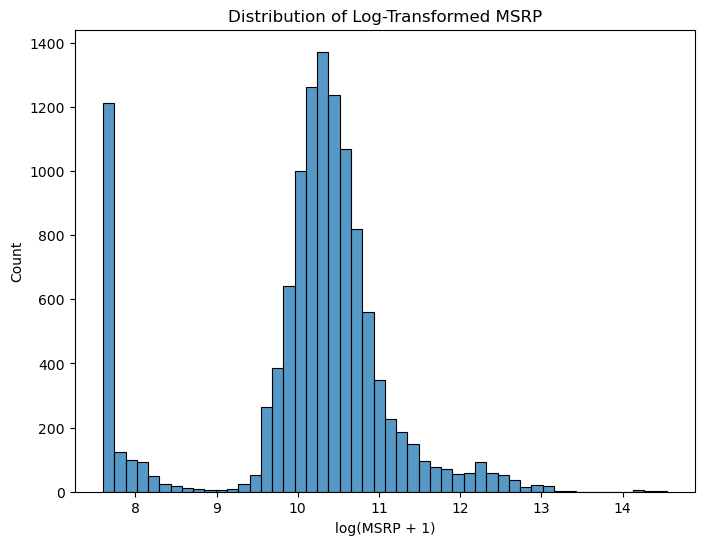

In [9]:
import numpy as np

# Create a new column
df['msrp_log'] = np.log1p(df['msrp'])  # log1p is log(1 + x) to handle zeros safely

# Plot the distribution of the log-transformed MSRP
plt.figure(figsize=(8, 6))
sns.histplot(df['msrp_log'], bins=50, kde=False)
plt.title('Distribution of Log-Transformed MSRP')
plt.xlabel('log(MSRP + 1)')
plt.ylabel('Count')
plt.show()


In [10]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,msrp_log
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,10.739349
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650,10.612779
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350,10.500977
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450,10.290483
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500,10.448744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120,10.739024
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670,10.945018
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620,10.832122
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920,10.838031


## Checking for missing values

In [11]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
msrp_log                0
dtype: int64

#### Dealing with missing values in "engine_fuel_type" column

In [12]:
df['engine_fuel_type'].value_counts()

engine_fuel_type
regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: count, dtype: int64

In [13]:
missing_fuel = df[df['engine_fuel_type'].isnull()]
missing_fuel

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,msrp_log
11321,suzuki,verona,2004,NaN,155.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,25,17,481,17199,9.752665
11322,suzuki,verona,2004,NaN,155.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,25,17,481,20199,9.913438
11323,suzuki,verona,2004,NaN,155.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,25,17,481,18499,9.825526


To see what fuel type Suzuki Verona typically uses (in rows where it’s not missing), we can filter the DataFrame for that specific make and model and then look at the engine_fuel_type column:

In [14]:
df.loc[
    (df['make'] == 'suzuki') & (df['model'] == 'verona') & (~df['engine_fuel_type'].isnull()),
    'engine_fuel_type'
].value_counts()

engine_fuel_type
regular_unleaded    6
Name: count, dtype: int64

 Since all Suzuki Verona entries (without missing values) use regular_unleaded, we can confidently fill the missing fuel type with "regular_unleaded".
 This ensures that the imputation is accurate for those specific rows, reflecting the typical fuel type for Suzuki Verona.

In [15]:
df.loc[
    (df['make'] == 'suzuki') & (df['model'] == 'verona') & (df['engine_fuel_type'].isnull()),
    'engine_fuel_type'
] = 'regular_unleaded'

### Dealing with missing values in "number_of_doors" column

In [16]:
# Filter the DataFrame to only rows where 'number_of_doors' is null
missing_doors = df[df['number_of_doors'].isnull()]

# Display these rows
missing_doors

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,msrp_log
4666,ferrari,ff,2013,premium_unleaded_(required),651.0,12.0,automated_manual,all_wheel_drive,NaN,"exotic,high-performance",large,coupe,16,11,2774,295000,12.594734
6930,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,NaN,"exotic,performance",large,sedan,105,102,1391,79500,11.283525
6931,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,NaN,"exotic,performance",large,sedan,101,98,1391,66000,11.097425
6932,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,NaN,"exotic,high-performance",large,sedan,105,92,1391,134500,11.809327
6933,tesla,model_s,2016,electric,NaN,0.0,direct_drive,rear_wheel_drive,NaN,"exotic,performance",large,sedan,100,97,1391,74500,11.218568
6934,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,NaN,"exotic,performance",large,sedan,107,101,1391,71000,11.170449


This will show you exactly which rows (and corresponding data in other columns) have missing values in the number_of_doors column. From there, you can decide on the best way to handle or impute those values.

In [17]:
import pandas as pd
import numpy as np

# 1) Create a dictionary for the mode of number_of_doors per (make, model, year)
doors_mode_map = (
    df.groupby(['make', 'model', 'year'])['number_of_doors']
      .agg(lambda x: x.value_counts().index[0] if not x.value_counts().empty else np.nan)
      .to_dict()
)

# 2) Impute missing number_of_doors by looking up the (make, model, year) mode
missing_doors_idx = df[df['number_of_doors'].isnull()].index

for idx in missing_doors_idx:
    mk = df.loc[idx, 'make']
    md = df.loc[idx, 'model']
    yr = df.loc[idx, 'year']

    # Look up the mode in the dictionary
    doors_val = doors_mode_map.get((mk, md, yr), np.nan)

    # If the group has no known door count, you can:
    #   (a) fall back to (make, model) only
    #   (b) use a global mode or median
    #   (c) drop the row if it's very rare
    if pd.isna(doors_val):
        # Example fallback: fill with the global mode
        doors_val = df['number_of_doors'].mode()[0]

    # Assign the value
    df.loc[idx, 'number_of_doors'] = doors_val

# 3) Verify no more missing values
print(df['number_of_doors'].isnull().sum())


0


#### Explanation
* Group by (make, model, year): This finds the most common (mode) number of doors for each specific combination.
* Loop Over Missing Rows: For each row with NaN in number_of_doors, we look up the (make, model, year) in doors_mode_map.
* Fallback: If (make, model, year) isn’t in the dictionary (i.e., no non-missing entries for that group), we use a fallback. In the code snippet above, we fill with the global mode of number_of_doors, but you could also drop the row or try (make, model) only.
* This approach ensures you use the most specific information first (make/model/year), while having a backup plan if there’s no data for that exact group.

#### Best approach

Using domain knowledge (or consistent data from other rows for the same model) to impute missing values is often the best approach. 

Here’s why:

* Accuracy: If every Ferrari FF in our dataset (except the missing ones) has 2 doors, imputing “2” is likely more accurate than a global mode or median that doesn’t account for the specific make/model.

* Preserves Variation: Global imputation (e.g., using a single mode across the entire dataset) can distort the natural distribution of number_of_doors. By leveraging data from the exact make/model, you’re preserving real-world variation.

* Domain-Specific Knowledge: Car specifications (e.g., a Tesla Model S having 4 doors) are generally consistent. Using that knowledge avoids guesswork.

In general, the more context you can incorporate into your imputation strategy, the better—as long as you don’t overfit or inject incorrect assumptions.

### Dealing with missing values in "engine_hp" column

In [18]:
missing_hp = df[df['engine_hp'].isnull()]
missing_hp


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,msrp_log
539,fiat,500e,2015,electric,NaN,0.0,direct_drive,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,108,122,819,31800,10.367253
540,fiat,500e,2016,electric,NaN,0.0,direct_drive,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,103,121,819,31800,10.367253
541,fiat,500e,2017,electric,NaN,0.0,direct_drive,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,103,121,819,31800,10.367253
2905,lincoln,continental,2017,premium_unleaded_(recommended),NaN,6.0,automatic,all_wheel_drive,4.0,luxury,large,sedan,25,17,61,55915,10.931606
2906,lincoln,continental,2017,premium_unleaded_(recommended),NaN,6.0,automatic,front_wheel_drive,4.0,luxury,large,sedan,27,18,61,62915,11.049556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,kia,soul_ev,2015,electric,NaN,0.0,direct_drive,front_wheel_drive,4.0,NaN,compact,wagon,92,120,1720,35700,10.482934
9851,kia,soul_ev,2015,electric,NaN,0.0,direct_drive,front_wheel_drive,4.0,NaN,compact,wagon,92,120,1720,33700,10.425283
9852,kia,soul_ev,2016,electric,NaN,0.0,direct_drive,front_wheel_drive,4.0,NaN,compact,wagon,92,120,1720,33950,10.432674
9853,kia,soul_ev,2016,electric,NaN,0.0,direct_drive,front_wheel_drive,4.0,NaN,compact,wagon,92,120,1720,31950,10.371959


In [19]:
hp_variations = (
    df.groupby(['make', 'model', 'year'])['engine_hp']
      .unique()
      .reset_index()
)

hp_variations.head()


,make,model,year,engine_hp
0,acura,cl,2001,[225.0]
1,acura,cl,2002,[225.0]
2,acura,cl,2003,"[260.0, 225.0]"
3,acura,ilx,2015,"[201.0, 150.0]"
4,acura,ilx,2016,[201.0]


### Explanation
* The idea is to impute missing HP with the most common HP for that exact combination of make, model, and year—this is typically the most accurate approach if data exists for that combination.
* If (make, model, year) had no non-missing engine_hp data, you’ll at least try to impute from the most common HP for that make and model (regardless of year).
* Some (make, model, year) groups might not appear elsewhere in the dataset with a valid HP. But perhaps the same make and model (different year) does appear. Using that as a fallback is better than no data at all.
* If both (make, model, year) and (make, model) fail to provide a mode, we use the global median of engine_hp across the entire dataset.
Alternatively, you could choose a global mean or decide to drop these rows entirely, depending on your preference.
* Why do this?

This is a final safety net for rows that truly have no matching data anywhere else in the dataset.
Using the median is a common choice because it’s robust to outliers.

In [20]:
# 1) Create a dictionary for (make, model, year) mode
hp_mode_map = (
    df.groupby(['make', 'model', 'year'])['engine_hp']
      .agg(lambda x: x.value_counts().index[0] if not x.value_counts().empty else np.nan)
      .to_dict()
)

In [21]:
hp_mode_map

{('acura', 'cl', 2001): 225.0,
 ('acura', 'cl', 2002): 225.0,
 ('acura', 'cl', 2003): 260.0,
 ('acura', 'ilx', 2015): 150.0,
 ('acura', 'ilx', 2016): 201.0,
 ('acura', 'ilx', 2017): 201.0,
 ('acura', 'ilx_hybrid', 2014): 111.0,
 ('acura', 'integra', 1999): 140.0,
 ('acura', 'integra', 2000): 140.0,
 ('acura', 'integra', 2001): 140.0,
 ('acura', 'legend', 1993): 200.0,
 ('acura', 'legend', 1994): 230.0,
 ('acura', 'legend', 1995): 200.0,
 ('acura', 'mdx', 2015): 290.0,
 ('acura', 'mdx', 2016): 290.0,
 ('acura', 'mdx', 2017): 290.0,
 ('acura', 'nsx', 2004): 290.0,
 ('acura', 'nsx', 2005): 290.0,
 ('acura', 'nsx', 2017): 573.0,
 ('acura', 'rdx', 2015): 273.0,
 ('acura', 'rdx', 2016): 279.0,
 ('acura', 'rdx', 2017): 279.0,
 ('acura', 'rl', 2010): 300.0,
 ('acura', 'rl', 2011): 300.0,
 ('acura', 'rl', 2012): 300.0,
 ('acura', 'rlx', 2015): 310.0,
 ('acura', 'rlx', 2016): 310.0,
 ('acura', 'rlx', 2017): 310.0,
 ('acura', 'rsx', 2004): 160.0,
 ('acura', 'rsx', 2005): 160.0,
 ('acura', 'rsx', 

In [22]:
# 2) Create a dictionary for (make, model) mode as a fallback
hp_mode_map_makemodel = (
    df.groupby(['make', 'model'])['engine_hp']
      .agg(lambda x: x.value_counts().index[0] if not x.value_counts().empty else np.nan)
      .to_dict()
)


In [23]:
hp_mode_map_makemodel

{('acura', 'cl'): 225.0,
 ('acura', 'ilx'): 201.0,
 ('acura', 'ilx_hybrid'): 111.0,
 ('acura', 'integra'): 140.0,
 ('acura', 'legend'): 200.0,
 ('acura', 'mdx'): 290.0,
 ('acura', 'nsx'): 290.0,
 ('acura', 'rdx'): 279.0,
 ('acura', 'rl'): 300.0,
 ('acura', 'rlx'): 310.0,
 ('acura', 'rsx'): 160.0,
 ('acura', 'slx'): 190.0,
 ('acura', 'tl'): 305.0,
 ('acura', 'tlx'): 290.0,
 ('acura', 'tsx'): 201.0,
 ('acura', 'tsx_sport_wagon'): 201.0,
 ('acura', 'vigor'): 176.0,
 ('acura', 'zdx'): 300.0,
 ('alfa_romeo', '4c'): 237.0,
 ('aston_martin', 'db7'): 420.0,
 ('aston_martin', 'db9'): 510.0,
 ('aston_martin', 'db9_gt'): 540.0,
 ('aston_martin', 'dbs'): 510.0,
 ('aston_martin', 'rapide'): 470.0,
 ('aston_martin', 'rapide_s'): 552.0,
 ('aston_martin', 'v12_vanquish'): 460.0,
 ('aston_martin', 'v12_vantage'): 510.0,
 ('aston_martin', 'v12_vantage_s'): 565.0,
 ('aston_martin', 'v8_vantage'): 430.0,
 ('aston_martin', 'vanquish'): 568.0,
 ('aston_martin', 'virage'): 490.0,
 ('audi', '100'): 172.0,
 ('

In [24]:
# 3) Impute missing engine_hp
for idx in df[df['engine_hp'].isnull()].index:
    mk = df.loc[idx, 'make']
    md = df.loc[idx, 'model']
    yr = df.loc[idx, 'year']

    # Try (make, model, year) mode first
    hp_val = hp_mode_map.get((mk, md, yr), np.nan)

    # If not found, try (make, model) mode
    if pd.isna(hp_val):
        hp_val = hp_mode_map_makemodel.get((mk, md), np.nan)

    # If still not found, as a last resort use global median (or drop the row)
    if pd.isna(hp_val):
        hp_val = df['engine_hp'].median()

    df.loc[idx, 'engine_hp'] = hp_val

In [25]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        0
engine_hp               0
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         0
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
msrp_log                0
dtype: int64

### Dealing with missing values in 'engine_cylinders' column

In [26]:
missing_cylinders = df[df['engine_cylinders'].isnull()]
missing_cylinders


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,msrp_log
1983,chevrolet,bolt_ev,2017,electric,200.0,NaN,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,110,128,1385,40905,10.619032
1984,chevrolet,bolt_ev,2017,electric,200.0,NaN,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,110,128,1385,36620,10.508377
3716,volkswagen,e-golf,2015,electric,115.0,NaN,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,105,126,873,33450,10.417837
3717,volkswagen,e-golf,2015,electric,115.0,NaN,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,105,126,873,35445,10.475766
3718,volkswagen,e-golf,2016,electric,115.0,NaN,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,105,126,873,28995,10.274913
3719,volkswagen,e-golf,2016,electric,115.0,NaN,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,105,126,873,35595,10.479989
5778,mitsubishi,i-miev,2014,electric,66.0,NaN,direct_drive,rear_wheel_drive,4.0,hatchback,compact,4dr_hatchback,99,126,436,22995,10.043076
5779,mitsubishi,i-miev,2016,electric,66.0,NaN,direct_drive,rear_wheel_drive,4.0,hatchback,compact,4dr_hatchback,99,126,436,22995,10.043076
5780,mitsubishi,i-miev,2017,electric,66.0,NaN,direct_drive,rear_wheel_drive,4.0,hatchback,compact,4dr_hatchback,102,121,436,22995,10.043076
8373,toyota,rav4_ev,2012,electric,154.0,NaN,direct_drive,front_wheel_drive,4.0,crossover,midsize,4dr_suv,74,78,2031,49800,10.815790


we can use the same group-based imputation strategy we used for engine_hp and number_of_doors:

* Group by (make, model, year) and find the most frequent (mode) engine_cylinders.
* Map missing rows to that mode if it exists.
* Fallback to a broader grouping (e.g., (make, model) only) or a global statistic if you still have missing values.

In [27]:
import numpy as np
import pandas as pd

# 1) Create a dictionary for the mode of engine_cylinders per (make, model, year)
cyl_mode_map = (
    df.groupby(['make', 'model', 'year'])['engine_cylinders']
      .agg(lambda x: x.value_counts().index[0] if not x.value_counts().empty else np.nan)
      .to_dict()
)

# 2) Identify rows with missing engine_cylinders
missing_cyl_idx = df[df['engine_cylinders'].isnull()].index

# 3) Impute missing values using (make, model, year) mode, with a fallback
for idx in missing_cyl_idx:
    mk = df.loc[idx, 'make']
    md = df.loc[idx, 'model']
    yr = df.loc[idx, 'year']
    
    # Try (make, model, year)
    cyl_val = cyl_mode_map.get((mk, md, yr), np.nan)
    
    # If that fails, fallback to (make, model) only
    if pd.isna(cyl_val):
        cyl_val = (
            df.groupby(['make', 'model'])['engine_cylinders']
              .agg(lambda x: x.value_counts().index[0] if not x.value_counts().empty else np.nan)
              .to_dict()
              .get((mk, md), np.nan)
        )
    
    # If still not found, you could use a global median, mode, or drop
    if pd.isna(cyl_val):
        cyl_val = df['engine_cylinders'].mode()[0]  # global mode as a final fallback
    
    # Assign the value
    df.loc[idx, 'engine_cylinders'] = cyl_val

# 4) Verify no more missing engine_cylinders
df['engine_cylinders'].isnull().sum()


0

Special Note for Electric Vehicles
Electric cars (like the Chevrolet Bolt EV, Volkswagen e-Golf, Mitsubishi i-MiEV) have 0 cylinders.
If your data already indicates that these models use engine_cylinders = 0, you could directly impute 0 for any missing electric vehicles.

In [28]:
df.loc[df['engine_fuel_type'].str.contains('electric', na=False), 'engine_cylinders'] = 0


In [29]:

df[df['engine_fuel_type'].str.contains('electric', na=False)].head(20)


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,msrp_log
539,fiat,500e,2015,electric,227.0,0.0,direct_drive,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,108,122,819,31800,10.367253
540,fiat,500e,2016,electric,227.0,0.0,direct_drive,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,103,121,819,31800,10.367253
541,fiat,500e,2017,electric,227.0,0.0,direct_drive,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,103,121,819,31800,10.367253
1680,mercedes-benz,b-class_electric_drive,2015,electric,177.0,0.0,direct_drive,front_wheel_drive,4.0,"hatchback,luxury",compact,4dr_hatchback,82,85,617,41450,10.632267
1681,mercedes-benz,b-class_electric_drive,2016,electric,177.0,0.0,direct_drive,front_wheel_drive,4.0,"hatchback,luxury",compact,4dr_hatchback,82,85,617,41450,10.632267
1682,mercedes-benz,b-class_electric_drive,2017,electric,177.0,0.0,direct_drive,front_wheel_drive,4.0,"hatchback,luxury",compact,4dr_hatchback,82,85,617,39900,10.594157
1983,chevrolet,bolt_ev,2017,electric,200.0,0.0,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,110,128,1385,40905,10.619032
1984,chevrolet,bolt_ev,2017,electric,200.0,0.0,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,110,128,1385,36620,10.508377
3716,volkswagen,e-golf,2015,electric,115.0,0.0,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,105,126,873,33450,10.417837
3717,volkswagen,e-golf,2015,electric,115.0,0.0,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,105,126,873,35445,10.475766


In [32]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
msrp_log             0
dtype: int64

In [31]:
df.drop(columns=['market_category'], inplace=True)